In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dfRetro = pd.read_csv('C:\\Users\\Sam\\Documents\\Data Mining\\Project\\retrosheet-events-plus-woba-2005_2015.csv')
altitudes = pd.read_excel("C:\\Users\\Sam\\Documents\\Data Mining\\Project\\Park_Factor\\Project_Code\\MLB_Stadium_Altitudes.xlsx")
altitudes=altitudes.drop(21)

In [4]:
dfRetro = dfRetro.drop(['time_since_1900', 'wOBA_pts', 'bat_hand_cd', 'base1_run_id', 'base2_run_id', 'base3_run_id','pitch_seq_tx','po1_fld_cd', 'po2_fld_cd','pit_start_fl', 'pa_ball_ct', 'pa_strike_ct', 'bat_fate_id', 'run1_fate_id', 'run2_fate_id', 'run3_fate_id', 'battedball_cd', 'inn_new_fl', 'inn_end_fl', 'pit_hand_cd'], axis=1)


In [5]:
#now drop any unnecessary events we don't need 
#stolen bases (4), caught stealing (6), pickoff (8), 

dfRetro = dfRetro[dfRetro.event_cd != 4]
dfRetro = dfRetro[dfRetro.event_cd != 6]
dfRetro = dfRetro[dfRetro.event_cd != 8]


In [6]:
events_with_altitudes = pd.merge(dfRetro, altitudes, on='home_team_id')


In [7]:
#creating sorted array of team ids
team_ids = []
for ii in dfRetro.home_team_id.unique():
    team_ids.append(ii)
team_ids = sorted(team_ids)
#initializing 2d array for total runs 
total_runs = [[0 for i in range(2)] for j in range(31)] 
for i in range(0,31):
     total_runs[i][0] = team_ids[i]
index = 0
#getting total runs for each team
for ii in team_ids:
    dfTemp = dfRetro.loc[dfRetro['home_team_id'] == ii]
    total_runs[index][1] = dfTemp['event_runs_ct'].sum()
    index +=1
    
#combine Miami and Florida 
total_runs[15][1] += total_runs[11][1]
del total_runs[11]

In [8]:
#need to get total home runs per team
home_runs = [[0 for i in range(2)] for j in range(31)] 
for i in range(0,31):
     home_runs[i][0] = team_ids[i]
index = 0
#getting total runs for each team
for ii in team_ids:
    dfTemp = dfRetro.loc[dfRetro['home_team_id'] == ii]
    dfTemp2 = dfTemp.loc[dfTemp['event_cd'] == 23]
    home_runs[index][1] = dfTemp2['game_id'].count()
    index +=1
    
#combine Miami and Florida 
home_runs[15][1] += home_runs[11][1]
del home_runs[11]

In [24]:
##calculating league average for home run fraction 
league_runs = 0
league_home_runs = 0
for ii in range(len(total_runs)):
    league_runs +=total_runs[ii][1] 
for ii in range(len(home_runs)):
    league_home_runs += home_runs[ii][1]
league_avg = league_home_runs/league_runs

In [10]:
HRF = []
for ii in range(len(total_runs)):
    HRF.append((home_runs[ii][1])/(total_runs[ii][1]))
HRF

[0.21507208387942334,
 0.22568741816450422,
 0.21279722148009617,
 0.26159488878371984,
 0.19840556927913766,
 0.26294528094013953,
 0.23513069832049502,
 0.27437308868501531,
 0.21403331650681473,
 0.20975056689342403,
 0.21623880597014924,
 0.24976982769959227,
 0.17752781513632473,
 0.21689113355780024,
 0.19073359073359072,
 0.25748206777145682,
 0.20052539404553416,
 0.25915558665733612,
 0.2199096261810215,
 0.2049966239027684,
 0.25163036790943766,
 0.1909006252494346,
 0.21427489013486892,
 0.22480948348856902,
 0.17969195664575013,
 0.19864199174544003,
 0.23590348806713873,
 0.23001667593107281,
 0.25867738399707707,
 0.2107157137145142]

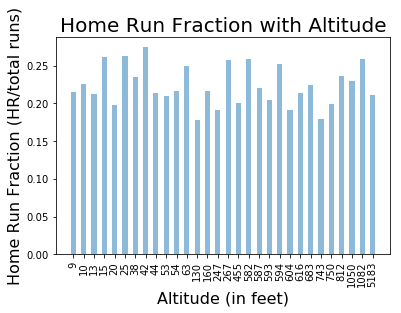

In [11]:
#graphing home run fraction vs altitude 
plt.title("Home Run Fraction with Altitude", size=20)
plt.xlabel("Altitude (in feet)", size=16)
plt.ylabel("Home Run Fraction (HR/total runs)", size=16)
y_pos = np.arange(len(HRF))
plt.bar(y_pos, HRF, align='center', alpha=0.5, width=0.5)
plt.xticks(y_pos, sorted(altitudes['altitude']), rotation='vertical')
plt.figure(figsize=(50, 3))
plt.show()

In [12]:
del team_ids[11]

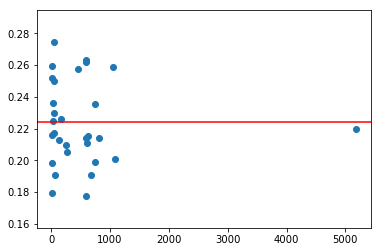

In [25]:
x = altitudes['altitude']
y = HRF
line = league_avg
#line = ax.plot(x,line)
fig, ax = plt.subplots()
plt.axhline(league_avg, color='r')

scatter = ax.scatter(x,y)
plt.show()

In [26]:
d = {'Team': team_ids,'Home Run Fraction': HRF, 'altitudes': altitudes['altitude']} 
dfCor = pd.DataFrame(data=d)
dfCor


,Home Run Fraction,Team,altitudes
0,0.215072,ANA,616
1,0.225687,ARI,160
2,0.212797,ATL,130
3,0.261595,BAL,594
4,0.198406,BOS,20
5,0.262945,CHA,582
6,0.235131,CHN,750
7,0.274373,CIN,42
8,0.214033,CLE,812
9,0.209751,COL,247


In [27]:
dfCor['altitudes'].corr(dfCor['Home Run Fraction'])

-0.048815551038958183